# Normal Distribution

## Normal Probability Distribution

In [46]:
from __future__ import division
import math
import random
from collections import *
from matplotlib import pyplot as plt
import numpy as np
def normal_pdf(x, mu=0,sigma=1):
    sqrt_2_pi_sigma = math.sqrt(2*math.pi) * sigma
    return math.exp(-(x-mu)**2/(2*sigma**2))/(sqrt_2_pi_sigma)

In [ ]:
xs = [x/10 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

## Normal Cumulative distribution

In [ ]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [ ]:
xs2 = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs2],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs2],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs2],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs2],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

### case 1

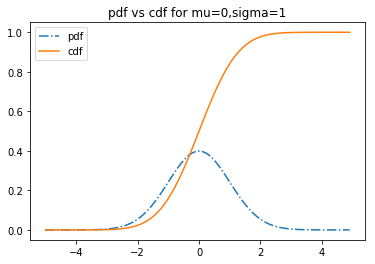

In [23]:
# xs = [x/10 for x in range(-50,50)]
# plt.plot
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-.',label='pdf')
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs2],'-',label='cdf')
plt.legend(loc=2)
plt.title("pdf vs cdf for mu=0,sigma=1")
plt.show()

### Case 2

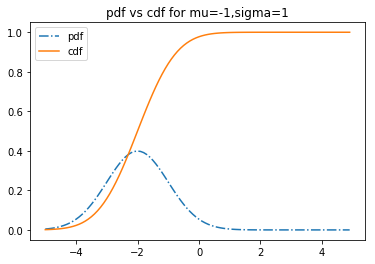

In [24]:
plt.plot(xs,[normal_pdf(x,mu=-2) for x in xs],'-.',label='pdf')
plt.plot(xs,[normal_cdf(x,mu=-2) for x in xs2],'-',label='cdf')
plt.legend(loc=2)
plt.title("pdf vs cdf for mu=-1,sigma=1")
plt.show()

## The central limit theory example (Binomial Theory)

In [43]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [44]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
    [v / num_points for v in histogram.values()],
    0.8,
    color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
    for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

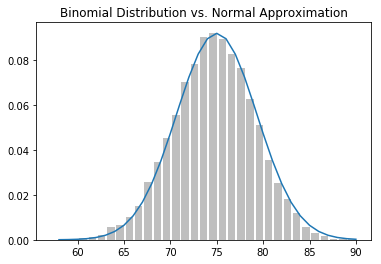

In [47]:
make_hist(0.75, 100, 10000)